In [1]:
import webbrowser

In [2]:
# webbrowser.open('https://google.com/')

In [3]:
# this module just opens websites

In [4]:
# now the next module is requests

In [5]:
import requests

In [6]:
# now the very first thing is get request

In [7]:
requests.get('https://api.github.com')

<Response [200]>

In [8]:
# now lets talk about response

In [9]:
response=requests.get('https://api.github.com')

In [10]:
# now lets talk about Status Codes

In [11]:
# now what is a status code it just tells you about the status of the request
# like 200 means OK and 404 means NOT_FOUND and it means that the resourse you 
# were looking for was not found and there are many other codes but these two are more
# common and if you get something else you can  just search them

In [12]:
response.status_code
# look 200 it means it is OK

200

In [13]:
# some times you might need to make some decission in your code
if response.status_code==200:
    print('Success')
elif response.status_code==400:
    print('Not Found!')
else:
    print('An ERROR has occurred')

Success


In [14]:
# fun fact 204 means that response was successful but there's no content to return in the message body

In [15]:
# so lets say that you don't want to check the response status code in an if statement so
# instead you want to raise an exception if the request was unsuccessful you can do this 
# .raise_for_status()

In [16]:
import requests
from requests.exceptions import HTTPError

for url in ['https://api.github.com', 'https://api.github.com/invalid']:
    try:
        response=requests.get(url)
#         fi the response was successful ,no exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')
    else:
        print('Success')
        
        
        

Success
HTTP error occurred: 404 Client Error: Not Found for url: https://api.github.com/invalid


In [17]:
# now lets see how to download a webpage

In [108]:
page=requests.get("https://weather.com/en-IN/weather/tenday/l/Kullu+Himachal+Pradesh?canonicalCityId=f9757eb6df510f3e5afbb40ac8ddbd28a9b4f01ba7f5509b85b552ea5ae2fdf7")

In [109]:
page

<Response [200]>

In [110]:
page.status_code

200

b'<!doctype html><html dir="ltr" lang="en-IN"><head>\n      <script type=\'text/javascript\' >window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390783636","applicationTime":1302.19119,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV","queueTime":0,"ttGuid":"bdc5298939e8c0","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390783636"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(c
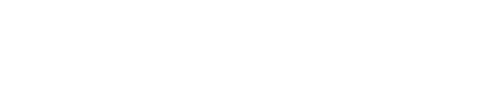
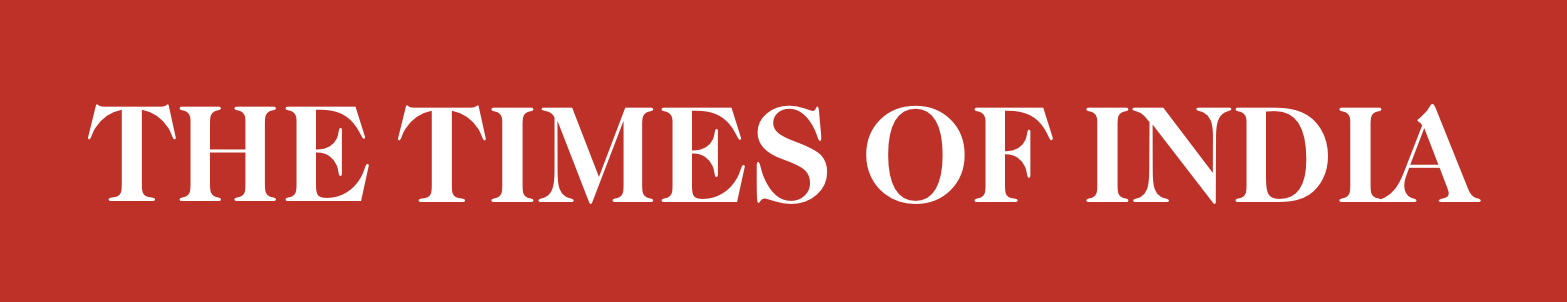
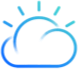

In [111]:
page.content

In [112]:
# now parsing a web page with beautiful soup begins

In [113]:
from bs4 import BeautifulSoup

In [114]:
soup=BeautifulSoup(page.content,'html.parser')

<!DOCTYPE html>
<html dir="ltr" lang="en-IN">
 <head>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"e6bbbab7f0","applicationID":"390783636","applicationTime":1302.19119,"transactionName":"Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV","queueTime":0,"ttGuid":"bdc5298939e8c0","agentToken":null}; (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"e6bbbab7f0",applicationID:"390783636"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(c(ar
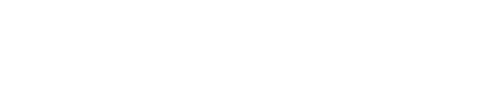
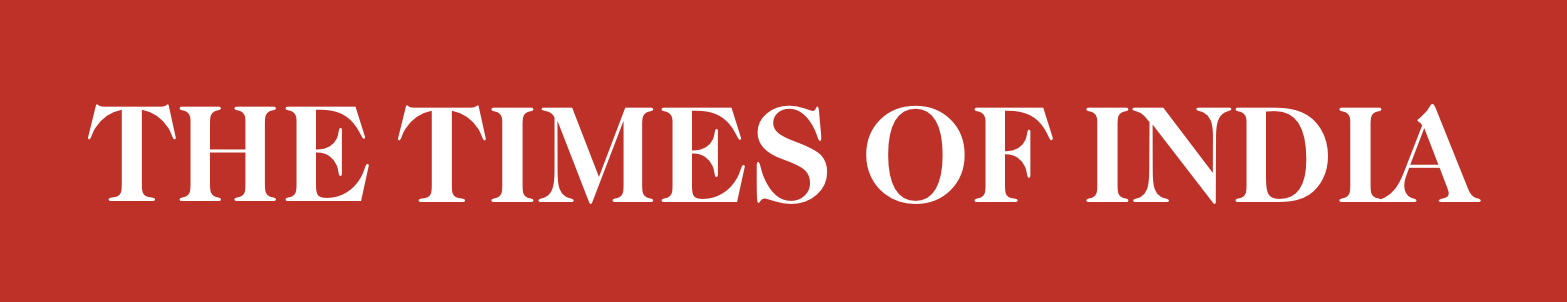
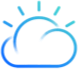

In [115]:
print(soup.prettify())

In [116]:
# soup.find_all('p')
# this to find for the tag like p tag or something else

In [117]:
# now lets search by class and id 

In [118]:
AllDatesHTML=(soup.find_all('h2',class_='_1Mebr')[0].get_text())
# you could also add id tags in there will play with them later
# now the next problem how to get the text

In [119]:
# And an extra bit of info if you wanna use find_all you gotta specift the [this]
# if you wanna get the pure text but if you wanna get the html version you are fine f
# with just find_all

In [120]:
print(AllDatesHTML)
# AllDates=AllDatesHTML.get_text()

Wed 30


In [121]:
# just got an idea how about make an list and append all this on that

In [137]:

AllDates=[]
for i in range(14):
    AllDates.append(soup.find_all('h2',class_='_1Mebr')[i].get_text())

In [138]:
AllDates

['Wed 30',
 'Thu 01',
 'Fri 02',
 'Sat 03',
 'Sun 04',
 'Mon 05',
 'Tue 06',
 'Wed 07',
 'Thu 08',
 'Fri 09',
 'Sat 10',
 'Sun 11',
 'Mon 12',
 'Tue 13']

In [139]:
# fuck yeah got all the dates

In [140]:
# now next step all the weather info

In [145]:
Weather_Info=[]
for i in range(13):
    print(i)
    Weather_Info.append(soup.find_all('span',class_='aaFeV')[i].get_text())



0
1
2
3
4
5
6
7
8
9
10
11
12


In [142]:
Weather_Info

['Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Sunny',
 'Mostly Sunny',
 'Sunny',
 'Sunny',
 'Sunny']

In [143]:
soup.find_all('span',class_='aaFeV')[0].get_text()


'Sunny'